## Does Correlation exist between Temperature & CO2, Aerosol, TSI

### Our Assumptions are

#### 1. Increase in Solar Irradiance increases Temperature 
#### 2. Increase in CO2 increases Temperature 
#### 3. Increase in Aerosol increases Temperature 

We are looking at the relationship value (adjusted r-Value) to prove that relationship exist between the parameters

### Analysis Process & Steps

#### Data file used and Preparation before Analysis
- We start with clean .csv file for parameters
- Data loaded onto dataframe using pandas
- Reconfirm that no missing values are present. If present, fill it with row-wise mean before analysis
- Reshape the data from columnwise monthly values to row-wise monthly values
- Add a Date column to assist in time-series plotting

#### Data Grouping
- All the data is grouped by Year and Month at global level.
- Averages are used to group the data

#### Data Merging
- Four dataframes are merged sequentially to produce one dataframe, that contains
    - Year, Month, Monthly_Temp, Monthly_Co2, Monthly_AER, Monthly_TSI

#### Correlation analysis
- pandas corr() function is used to derive correlation value (adjusted r-Value) for the each pair of the parameters
- so we get below correlation results for below pairs
    - Temp vs Co2
    - Temp vs Aerosol
    - Temp vs TSI
    - CO2 vs Aersol
    - Co2 vs TSI
    - Aerosol vs TSI
    
#### Visualization of Correlation trends
- A paired grid is used for visualizing all correlation trends
- Individual pairs are analysed through separate plot


In [1]:
# magic function for interactive plotting
%matplotlib inline

### Key packages required
This  analysis depends on usage of 
- data manipulation - pandas and numpy
- plotting using matplotlib, seaborn
- statistical analysis using scipy.stats 

In [55]:
import csv
import pandas as pd
import numpy as np
import os
from datetime import datetime
import calendar

import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns


from scipy.stats import linregress

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')


# Change the print display
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

In [56]:
# Global declarations
data_path = "..\data"

temp_dataFile = "NaN_Replaced_Temps.csv"
co2_dataFile = "CO2_GlobalSummary.csv"
aer_dataFile = "AER_GlobalSummary.csv"
tsi_dataFile = "TSI_MonthlyAvg.csv"

#Output folders
result_dir = "..\output"
image_dir = "..\images"

# Plot Style to use
#mpl.style.use('seaborn')
sns.set(style="ticks")

# - Month_num to Month Name mapping
month_num = dict((v,k) for k,v in enumerate(calendar.month_abbr))

month_name = list(v for k,v in enumerate(calendar.month_abbr))

# Plot Style to use
mpl.style.use('seaborn')
sns.set_style("darkgrid")
sns.set(font_scale=1.2)
color_spread = ['#0000FF','#00CCFF','#CCFFFF','#FFCC00','#FF9900','#FF6600']


### Ready Temperature dataframe to merge with other variables

In [4]:
#read  temp data file
tempDF = pd.read_csv(os.path.join(data_path, temp_dataFile))

# Temporary - Remove once final Temp Data file is ready
if(tempDF.isnull().values.sum() != 0):
    # fill the NA with rowwise means
    rowMeans = tempDF[month_name[1:]].mean(axis = 1)
    tempDF = tempDF.apply(lambda r: r.fillna(rowMeans[r.index]))

# reshape tempDF to have month values in the row
temp_flatDF = pd.melt(tempDF, id_vars =['Country','Year'], var_name = 'Month', value_name = "Monthly_Temp")   

temp_flatDF.head()
 

,Country,Year,Month,Monthly_Temp
0,ALGERIA,1975,Jan,8.9
1,ALGERIA,1976,Jan,8.6
2,ALGERIA,1977,Jan,11.0
3,ALGERIA,1978,Jan,9.1
4,ALGERIA,1979,Jan,13.0


In [5]:
# Group by year and month and aggregate values by mean()

temp_GDF_YM = temp_flatDF.groupby(['Year','Month']).agg(np.mean)

temp_GDF_YM.reset_index(inplace = True)

temp_GDF_YM.head()

,Year,Month,Monthly_Temp
0,1975,Apr,16.607500
1,1975,Aug,20.942917
2,1975,Dec,12.039167
3,1975,Feb,12.323333
4,1975,Jan,12.086667


### Ready CO2 to merge with Temp


In [6]:
#read  CO2  data file
co2DF = pd.read_csv(os.path.join(data_path, co2_dataFile))

if(co2DF.isnull().values.sum() != 0):
    # fill the NA with rowwise means
    rowMeans = co2DF[month_name[1:]].mean(axis = 1)
    co2DF = co2DF.apply(lambda r: r.fillna(rowMeans[r.index]))

# reshape DF to have month values in the row
co2_flatDF = pd.melt(co2DF, id_vars =['Year'], var_name = 'Month', value_name = "Monthly_Co2")   

co2_flatDF.head()

,Year,Month,Monthly_Co2
0,1975,Jan,332.43
1,1976,Jan,332.26
2,1977,Jan,333.94
3,1978,Jan,335.66
4,1979,Jan,337.40


### Ready Aerosol to merge with Temp

In [7]:
#read  AEROSOL  data file
aerDF = pd.read_csv(os.path.join(data_path, aer_dataFile))

if(aerDF.isnull().values.sum() != 0):
    # fill the NA with rowwise means
    rowMeans = aerDF[month_name[1:]].mean(axis = 1)
    aerDF = aerDF.apply(lambda r: r.fillna(rowMeans[r.index]))

# reshape DF to have month values in the row
aer_flatDF = pd.melt(aerDF, id_vars =['Year'], var_name = 'Month', value_name = "Monthly_AER")   

aer_flatDF.head()

,Year,Month,Monthly_AER
0,1975,Jan,795.03
1,1976,Jan,294.08
2,1977,Jan,351.42
3,1978,Jan,365.60
4,1979,Jan,339.98


### Ready TSI data to merge with Temp

In [9]:
#read  AEROSOL  data file
tsiDF = pd.read_csv(os.path.join(data_path, tsi_dataFile))

if(tsiDF.isnull().values.sum() != 0):
    # fill the NA with rowwise means
    rowMeans = tsiDF[month_name[1:]].mean(axis = 1)
    tsiDF = tsiDF.apply(lambda r: r.fillna(rowMeans[r.index]))

# reshape DF to have month values in the row
tsi_flatDF = pd.melt(tsiDF, id_vars =['Year'], var_name = 'Month', value_name = "Monthly_TSI")   



tsi_flatDF.head(10)

,Year,Month,Monthly_TSI
0,1970,Jan,1361.36
1,1971,Jan,1361.07
2,1972,Jan,1361.26
3,1973,Jan,1360.99
4,1974,Jan,1360.77
5,1975,Jan,1360.66
6,1976,Jan,1360.71
7,1977,Jan,1360.76
8,1978,Jan,1361.27
9,1979,Jan,1361.31


### Start Merging : Temp, CO2, AER and TSI

In [10]:
temp_co2 = pd.merge(temp_GDF_YM, co2_flatDF, left_on = ['Year','Month'], right_on = ['Year','Month'], \
                    how = 'inner', suffixes = ['_temp','_co2'])

temp_co2.head()

,Year,Month,Monthly_Temp,Monthly_Co2
0,1975,Apr,16.607500,332.08
1,1975,Aug,20.942917,328.45
2,1975,Dec,12.039167,332.29
3,1975,Feb,12.323333,332.38
4,1975,Jan,12.086667,332.43


In [11]:
temp_2var = pd.merge(temp_co2, aer_flatDF, left_on = ['Year','Month'], right_on = ['Year','Month'], \
                    how = 'inner')

temp_2var.head()

,Year,Month,Monthly_Temp,Monthly_Co2,Monthly_AER
0,1975,Apr,16.607500,332.08,451.73
1,1975,Aug,20.942917,328.45,711.68
2,1975,Dec,12.039167,332.29,629.23
3,1975,Feb,12.323333,332.38,795.03
4,1975,Jan,12.086667,332.43,795.03


In [12]:
temp_3var = pd.merge(temp_2var, tsi_flatDF, left_on = ['Year','Month'], right_on = ['Year','Month'], \
                    how = 'inner')

temp_3var.head()

,Year,Month,Monthly_Temp,Monthly_Co2,Monthly_AER,Monthly_TSI
0,1975,Apr,16.607500,332.08,451.73,1360.80
1,1975,Aug,20.942917,328.45,711.68,1360.51
2,1975,Dec,12.039167,332.29,629.23,1360.74
3,1975,Feb,12.323333,332.38,795.03,1360.64
4,1975,Jan,12.086667,332.43,795.03,1360.66


In [13]:
#Add colums to assist in further analysis
 
#Convert month names to month number
temp_3var['Month_Num'] = temp_3var['Month'].apply(lambda r: month_num[r] )

# Add Date column, example 01-Jan-1975
temp_3var['Date'] = temp_3var['Year'].astype(str)+'-'+temp_3var['Month_Num'].astype(str)+'-01'
temp_3var['Date'] = temp_3var['Date'].apply(lambda r: datetime.strptime(r , '%Y-%m-%d'))

#Sort Data Frame by Year and MOnth
temp_3var.sort_values(by = ['Year','Month_Num'])

temp_3var.head()

,Year,Month,Monthly_Temp,Monthly_Co2,Monthly_AER,Monthly_TSI,Month_Num,Date
0,1975,Apr,16.607500,332.08,451.73,1360.80,4,1975-04-01
1,1975,Aug,20.942917,328.45,711.68,1360.51,8,1975-08-01
2,1975,Dec,12.039167,332.29,629.23,1360.74,12,1975-12-01
3,1975,Feb,12.323333,332.38,795.03,1360.64,2,1975-02-01
4,1975,Jan,12.086667,332.43,795.03,1360.66,1,1975-01-01


## START ANALYSIS

### Use df.corr() to understand correlation between Temp and CO2

In [42]:
temp_3var_GDF = temp_3var[['Year','Monthly_Temp','Monthly_Co2','Monthly_AER','Monthly_TSI']].groupby('Year').agg(np.mean)
temp_3var_GDF.reset_index(inplace = True)
temp_3var_GDF.head()


,Year,Monthly_Temp,Monthly_Co2,Monthly_AER,Monthly_TSI
0,1975,16.578437,331.180000,795.030000,1360.715000
1,1976,16.183403,331.879167,553.450000,1360.694167
2,1977,16.634201,333.806667,351.295833,1360.889167
3,1978,16.402431,335.386667,319.229167,1361.213333
4,1979,16.594826,337.192500,348.967500,1361.600000


In [1]:
corrDF = temp_3var_GDF.corr()
printmd("### Perform Pearson Correlation on all the parameters within the Dataframe to get adjusted r-Value")
corrDF


NameError: name 'temp_3var_GDF' is not defined

### Correlation betwee Temperature and 3 factors, namely CO2, Aerosol and TSI

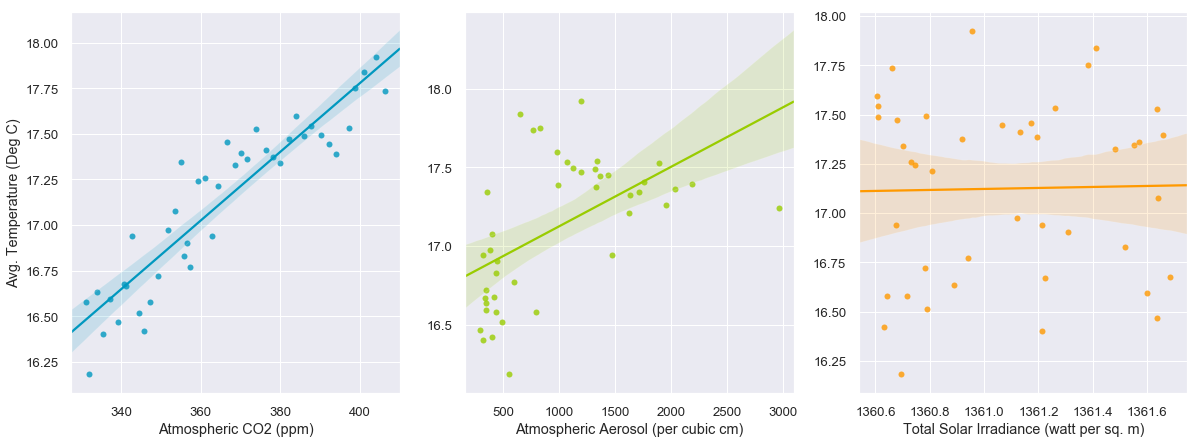

### Inference:

- Temperature Rise and CO2 have strong positive correlation of 0.922 adjusted r-Value :

- Temperature Rise and Aerosol have weak positive correlation of 0.547 adjusted r-Value  :

- Temperature Rise and TSI have no correlation of 0.021 adjusted r-Value  :

In [90]:
printmd("### Correlation betwee Temperature and 3 factors, namely CO2, Aerosol and TSI")
#create 3 subplots to show correlation
with sns.color_palette(n_colors = 3):
    fig, axs = plt.subplots(1, 3, figsize = (20, 7))
    sns.regplot(x = 'Monthly_Co2', y= 'Monthly_Temp', data = temp_3var_GDF, ax = axs[0], color = '#0098BF')
    sns.regplot(x = 'Monthly_AER', y= 'Monthly_Temp', data = temp_3var_GDF, ax = axs[1], color = '#99CC00')
    sns.regplot(x = 'Monthly_TSI', y= 'Monthly_Temp', data = temp_3var_GDF, ax = axs[2], color = '#FF9900')
    
    axs[0].set(xlabel='Atmospheric CO2 (ppm)', ylabel='Avg. Temperature (Deg C)')
    axs[1].set(xlabel='Atmospheric Aerosol (per cubic cm)', ylabel='')
    axs[2].set(xlabel='Total Solar Irradiance (watt per sq. m)', ylabel='')
    
plt.savefig(os.path.join(image_dir,'CorrelationPlot.png'))
plt.show()

printmd("### Inference:")
printmd(f"- Temperature Rise and CO2 have strong positive correlation of {round(corrDF.iloc[1,2],3)} adjusted r-Value :")
printmd(f"- Temperature Rise and Aerosol have weak positive correlation of {round(corrDF.iloc[1,3],3)} adjusted r-Value  :")
printmd(f"- Temperature Rise and TSI have no correlation of {round(corrDF.iloc[1,4],3)} adjusted r-Value  :")

### Study the individual relationships across years

In [64]:
#Get data for dual Y-Axis chart
yrs = temp_3var_GDF[['Year']]
temp = temp_3var_GDF[['Monthly_Temp']]
co2 = temp_3var_GDF[['Monthly_Co2']]
aer = temp_3var_GDF[['Monthly_AER']]
tsi = temp_3var_GDF[['Monthly_TSI']]

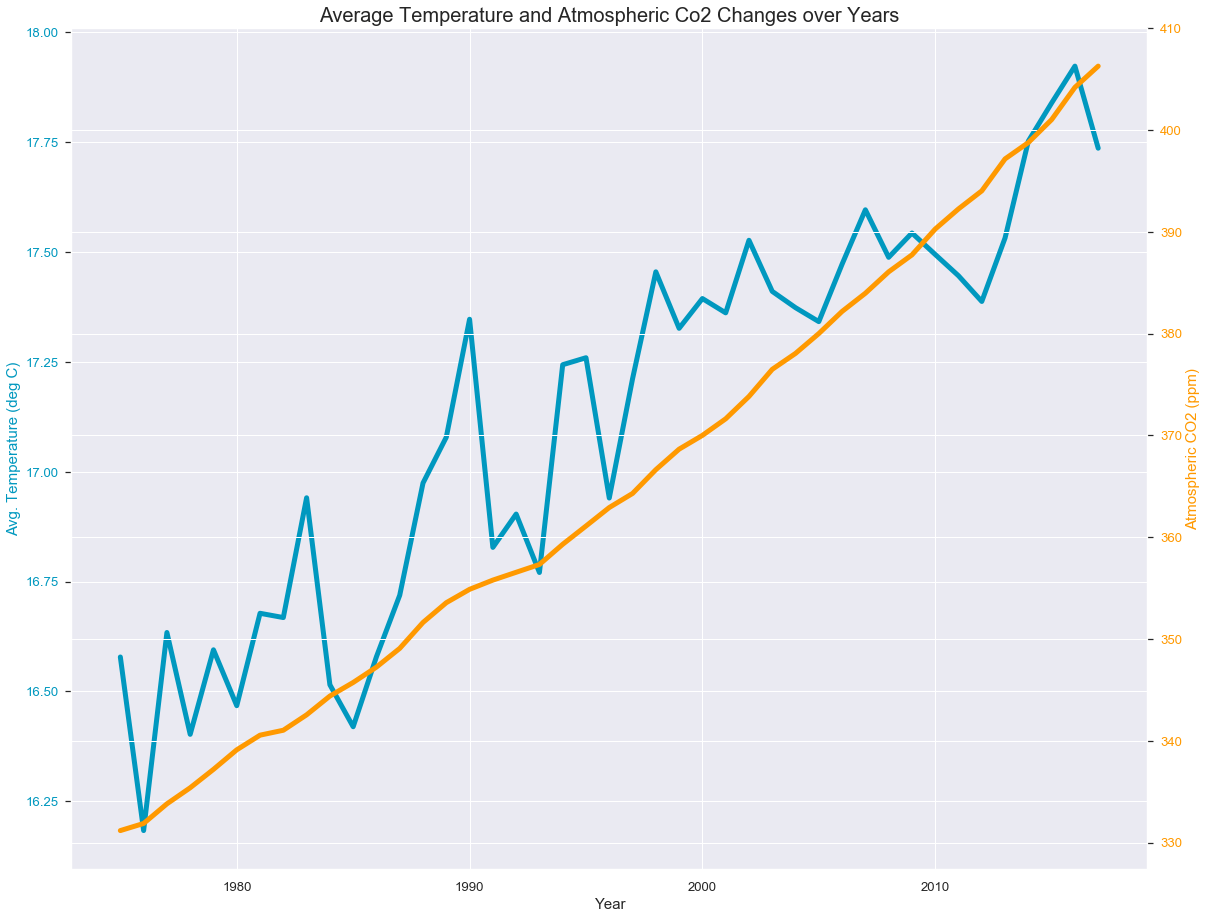

In [88]:
# Study Temp and Co2 across Years

fig, ax1 = plt.subplots(figsize = (17,13))

color = '#0098BF'
ax1.set_xlabel('Year', size=15)
ax1.set_ylabel('Avg. Temperature (deg C)', color=color, size=15)
ax1.plot(yrs, temp, color=color, linewidth = 5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#FF9900'
ax2.set_ylabel('Atmospheric CO2 (ppm)', color=color,size=15)  # we already handled the x-label with ax1
ax2.plot(yrs, co2, color=color, linewidth = 5)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Average Temperature and Atmospheric Co2 Changes over Years', size=20)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(os.path.join(image_dir,'TempCO2_TimeSeries.png'))

plt.show()


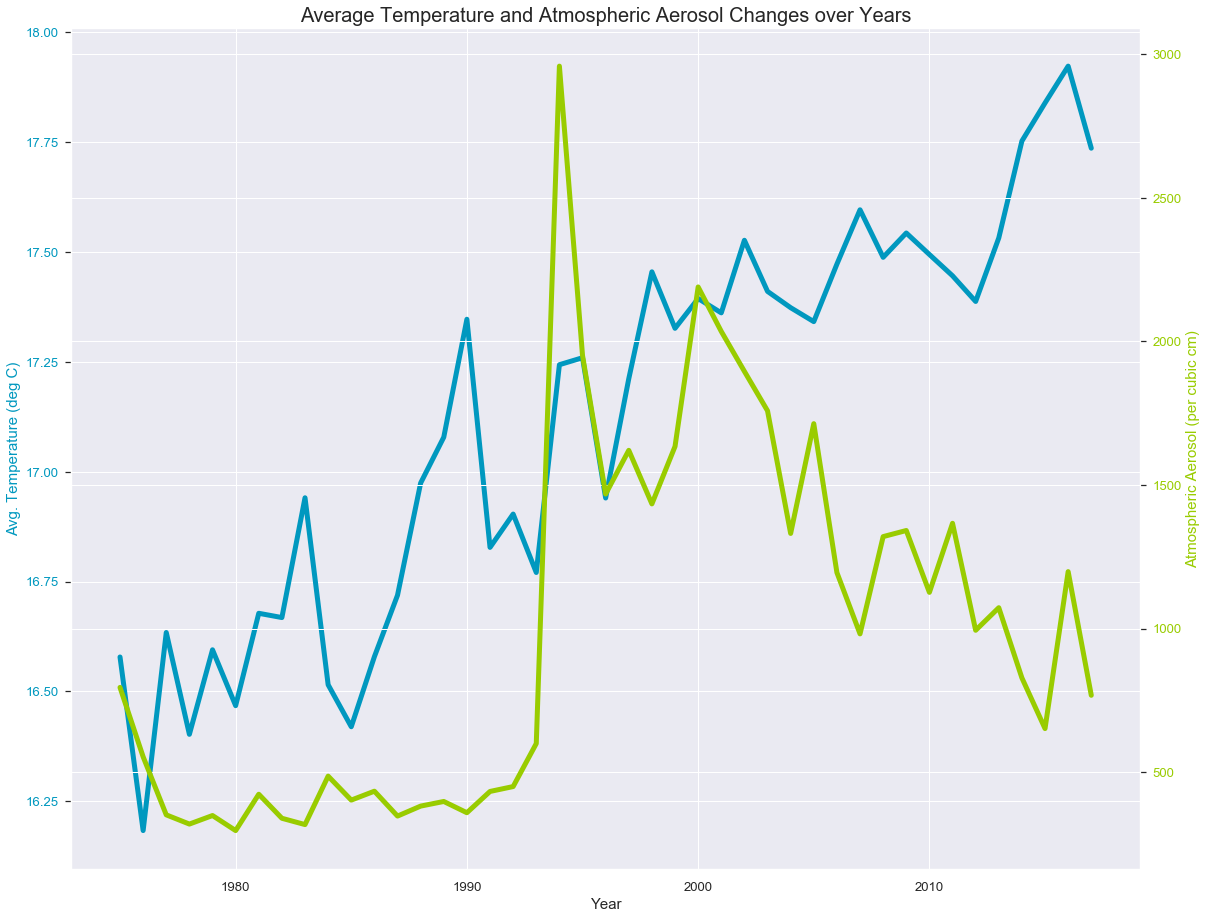

In [85]:
# Study Temp and Aerosol across Years

fig, ax1 = plt.subplots(figsize = (17,13))

color = '#0098BF'
ax1.set_xlabel('Year', size=15)
ax1.set_ylabel('Avg. Temperature (deg C)', color=color, size=15)
ax1.plot(yrs, temp, color=color, linewidth = 5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#99CC00'
ax2.set_ylabel('Atmospheric Aerosol (per cubic cm)', color=color,size=15)  # we already handled the x-label with ax1
ax2.plot(yrs, aer, color=color, linewidth = 5)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Average Temperature and Atmospheric Aerosol Changes over Years', size=20)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(os.path.join(image_dir,'TempAER_TimeSeries.png'))

plt.show()

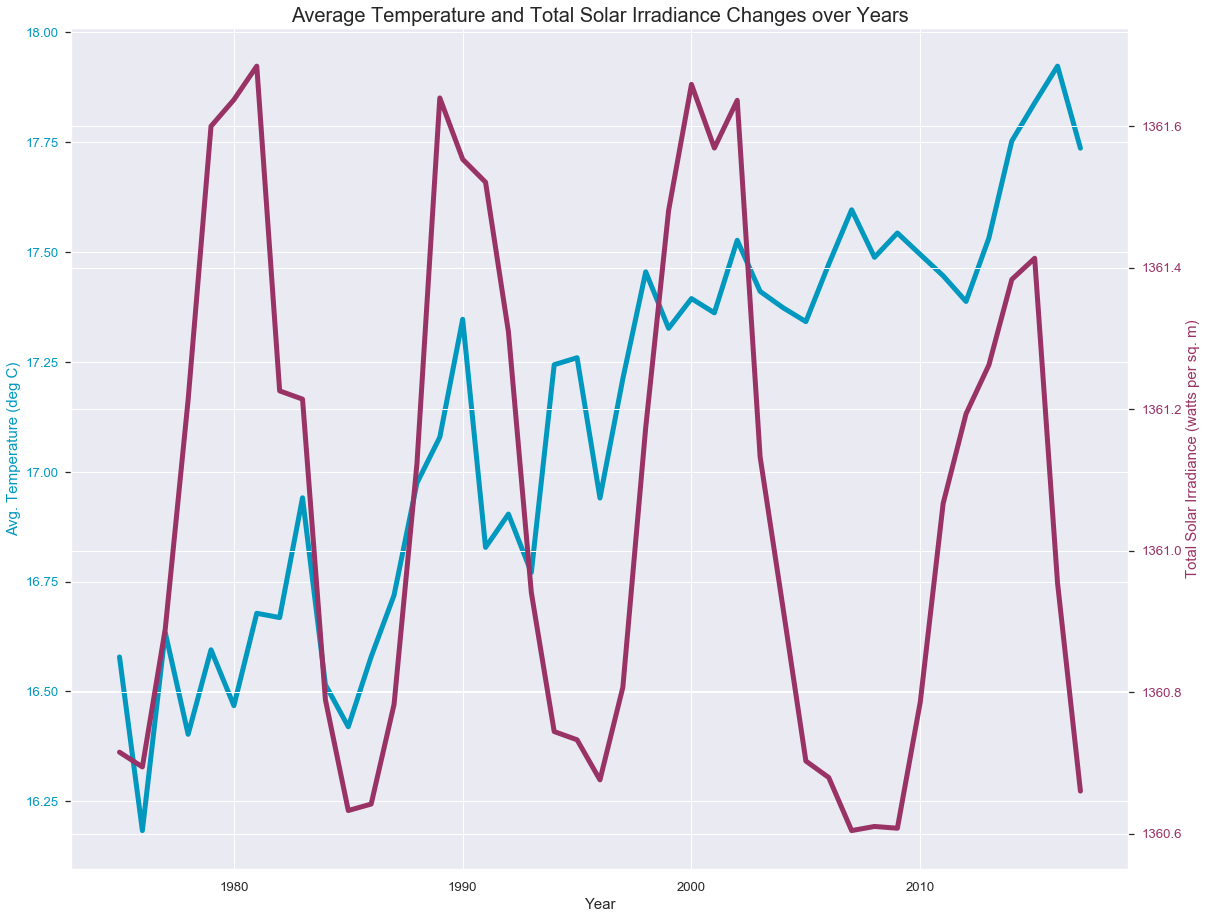

In [84]:
# Study Temp and Aerosol across Years

fig, ax1 = plt.subplots(figsize = (17,13))

color = '#0098BF'
ax1.set_xlabel('Year', size=15)
ax1.set_ylabel('Avg. Temperature (deg C)', color=color, size=15)
ax1.plot(yrs, temp, color=color, linewidth = 5)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = '#993366'
ax2.set_ylabel('Total Solar Irradiance (watts per sq. m)', color=color,size=15)  # we already handled the x-label with ax1
ax2.plot(yrs, tsi, color=color, linewidth = 5)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Average Temperature and Total Solar Irradiance Changes over Years', size=20)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig(os.path.join(image_dir,'TempTSI_TimeSeries.png'))

plt.show()